In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/zgulde/tidytuesday/master/data/2022/2022-02-01/breed_traits.csv')

This dataset contains information on different dog breeds. Answer the following questions:

- How many breeds have an energy level of 5? `35`
- How many different coat types are there? `10`
- What is the average drooling level of breeds with a long coat length? `1.483`
- What is the barking level of Anatolian Shepherd Dogs? `3`
- How many breeds have a smooth coat type, a short coat length, and a playfulness level of 3? `27`
- What percentage of breeds fall into each value of adaptability level? Make a visualization like the one below showing this

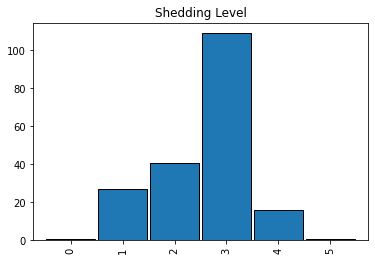

In [2]:
df.head()

,Breed,Affectionate With Family,Good With Young Children,Good With Other Dogs,Shedding Level,Coat Grooming Frequency,Drooling Level,Coat Type,Coat Length,Openness To Strangers,Playfulness Level,Watchdog/Protective Nature,Adaptability Level,Trainability Level,Energy Level,Barking Level,Mental Stimulation Needs
0,Retrievers (Labrador),5,5,5,4,2,2,Double,Short,5,5,3,5,5,5,3,4
1,French Bulldogs,5,5,4,3,1,3,Smooth,Short,5,5,3,5,4,3,1,3
2,German Shepherd Dogs,5,5,3,4,2,2,Double,Medium,3,4,5,5,5,5,3,5
3,Retrievers (Golden),5,5,5,4,2,2,Double,Medium,5,4,3,5,5,3,1,4
4,Bulldogs,4,3,3,3,3,3,Smooth,Short,4,4,3,3,4,3,2,3


In [3]:
#1
df['Energy Level'].value_counts()

3    81
4    76
5    35
2     2
0     1
Name: Energy Level, dtype: int64

In [4]:
(df['Energy Level'] == 5).sum()

35

In [12]:
#2
len(df['Coat Type'].unique())

10

In [13]:
df['Coat Type'].unique()

array(['Double', 'Smooth', 'Curly', 'Silky', 'Wavy', 'Wiry', 'Hairless',
       'Rough', 'Corded', 'Plott\xa0Hounds'], dtype=object)

In [39]:
df['Coat Type'].nunique()

10

In [23]:
#3
df2 = df[df['Coat Length'] == 'Long']
df2['Drooling Level'].mean()

1.4827586206896552

In [45]:
df.loc[df['Coat Length'] == 'Long', 'Drooling Level'].mean()

1.4827586206896552

In [46]:
#list(df.Breed.unique())

In [42]:
x = df[df.Breed == 'Anatolian\xa0Shepherd\xa0Dogs']
list(x['Barking Level'])

[3]

In [43]:
df.loc[df.Breed.str.startswith('Anatolian'), ['Breed', 'Barking Level']]

,Breed,Barking Level
84,Anatolian Shepherd Dogs,3


In [32]:
#4
y = df[df['Playfulness Level'] == 3]
z = y[y['Coat Length'] == 'Short']
(z['Coat Type'] == 'Smooth').sum()

27

In [35]:
import matplotlib.pyplot as plt

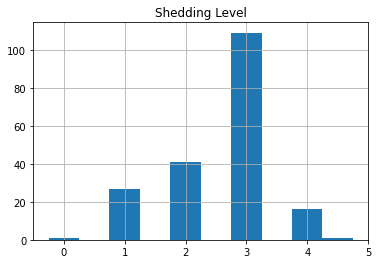

In [38]:
df['Shedding Level'].hist(align='left')
plt.title('Shedding Level')
plt.show()

In [50]:
shedding_levels = df['Shedding Level'].value_counts().sort_index()
shedding_levels / shedding_levels.sum()

0    0.005128
1    0.138462
2    0.210256
3    0.558974
4    0.082051
5    0.005128
Name: Shedding Level, dtype: float64

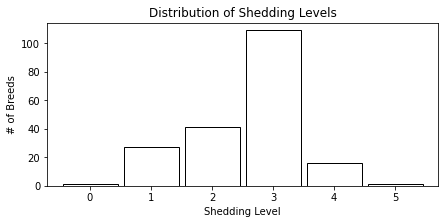

In [51]:
shedding_levels.plot.bar(
    width=.9,
    ec='black',
    fc='white',
    figsize=(7, 3),
    title='Distribution of Shedding Levels',
    ylabel='# of Breeds',
    xlabel='Shedding Level',
)
plt.xticks(rotation=0)
plt.show()